# John Alexis Munera Mejia

In [254]:
import pylab as pl
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation

# Generacion de datos

In [255]:
datos = []
#Generacion de datos
for x in range(1,100):
    datos.append(x)
# Funcion 1 --> y = x/2
f1 = []
f1d = []
for x in datos:
    #genero una lista que sera la usada en el clasificador para evitar el error
    f1.append([x/2, x/2])
    #genero otra con los mismos datos para ser usada en la grafica
    f1d.append(x/2)

#Funcion 2 --> y = (x^3)/3
f2 = []
f2d = []
for x in datos:
    f2.append([(x^3)/3,(x^3)/3])
    f2d.append((x^3)/3)
#Funcion 3 --> y = x*(x/5)
f3= []
f3d = []
for x in datos:
    f3.append([x*(x/5), x*(x/5)])
    f3d.append(x*(x/5))


# Graficas de conjunto de datos

----------- y = x/2 ------------------


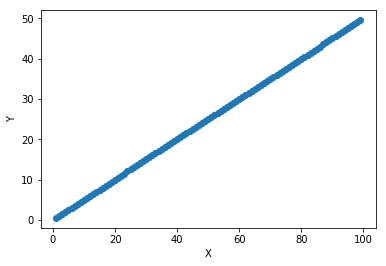

----------- y = (x^3)/3 ------------------


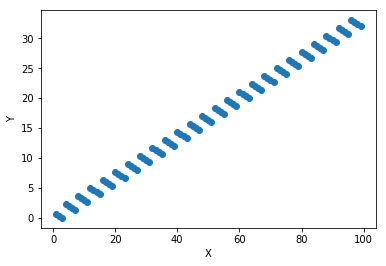

----------- y = x*(x/5) ------------------


In [256]:
#graficamos todas las funciones
print('----------- y = x/2 ------------------')
pl.scatter(datos, f1d)
pl.xlabel('X')
pl.ylabel('Y')
pl.show()
print('----------- y = (x^3)/3 ------------------')
pl.scatter(datos, f2d)
pl.xlabel('X')
pl.ylabel('Y')
pl.show()
print('----------- y = x*(x/5) ------------------')
pl.scatter(datos, f3d)
pl.xlabel('X')
pl.ylabel('Y')
pl.show()


In [257]:
def Remocion(X_train, X_test):
    # almacenamos los parametros de entrenamiento
    X_train_mean = X_train.mean(axis = 0)
    X_train_std = X_train.std(axis = 0)
    #aplicamos el preprocesamiento
    X_train = (X_train - X_train_mean)/X_train_std
    X_test = (X_test - X_train_mean)/X_train_std
    return X_train,X_test

# Particion de datos

In [258]:
funciones = [f1,f2,f3]
#Recorro todas mis matrices
for f in funciones:
    #Convierto la matriz de tipo nativo de python a matriz de numpy para poder aplica
    #sus funciones
    X = np.matrix(f)
    y = datos
    
    #Separacion de datos 70/30
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    X_train, X_test = Remocion(X_train, X_test)
    #instancia de clasificador
    # Uso C de 10000, despues de varias pruebas con valores entre 10 - 1000000
    # el resultado es el mismo
    clasificador = LogisticRegression(C=10000, random_state=0)    
    clasificador.fit(X_train, y_train)
    y_pred = clasificador.predict(X_test)
    mal_clasificadas = (y_test != y_pred).sum()
    porc_acierto = (100-((y_test != y_pred).sum()/30)*100)
    print('\n----------------------------------------------------------------')
    print('Las muestras mal clasificadas fueron %d' % mal_clasificadas)
    print('El porcentaje de acierto de clasificacion fue %s' % porc_acierto)
    print('Resultado esperado: \n', y_test)
    print('Resultado obtenido: \n', y_pred)


----------------------------------------------------------------
Las muestras mal clasificadas fueron 30
El porcentaje de acierto de clasificacion fue 0.0
Resultado esperado: 
 [27, 87, 3, 56, 76, 93, 17, 74, 55, 95, 54, 92, 79, 14, 8, 31, 23, 25, 34, 9, 44, 63, 4, 72, 46, 49, 7, 99, 83, 77]
Resultado obtenido: 
 [26 88  2 57 75 94 16 75 57 96 53 91 80 13  6 30 22 24 33 10 43 64  5 73 45
 48  6 98 84 78]

----------------------------------------------------------------
Las muestras mal clasificadas fueron 30
El porcentaje de acierto de clasificacion fue 0.0
Resultado esperado: 
 [27, 87, 3, 56, 76, 93, 17, 74, 55, 95, 54, 92, 79, 14, 8, 31, 23, 25, 34, 9, 44, 63, 4, 72, 46, 49, 7, 99, 83, 77]
Resultado obtenido: 
 [20 86  2 57 82 94 18 73 48 94 53 98 78 15 15 24 16 26 35 10 45 62  5 73 47
 50  6 98 82 78]

----------------------------------------------------------------
Las muestras mal clasificadas fueron 30
El porcentaje de acierto de clasificacion fue 0.0
Resultado esperado: 
 [27,

In [259]:
for f in funciones:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    X_train, X_test = Remocion(X_train, X_test)
    #instanciamos el clasificador
    clasificador = GaussianNB()
    #entrenamos el clasificador
    clasificador.fit(X_train, y_train)
    #validamos el clasificador
    y_pred = clasificador.predict(X_test)
    #calculamos el acierto de clasificación
    acc = 100*(y_test==y_pred).sum()/X_test.shape[0]
    print('\n----------------------------------------------------------------')
    print('El acierto de clasificación es el ', acc, '%')
    print('Resultado esperado: \n', y_test)
    print('Resultado obtenido: \n', y_pred)


----------------------------------------------------------------
El acierto de clasificación es el  0.0 %
Resultado esperado: 
 [27, 87, 3, 56, 76, 93, 17, 74, 55, 95, 54, 92, 79, 14, 8, 31, 23, 25, 34, 9, 44, 63, 4, 72, 46, 49, 7, 99, 83, 77]
Resultado obtenido: 
 [26 86  2 57 75 94 16 73 53 94 53 91 78 13  6 30 22 24 33 10 43 62  5 71 45
 48  6 98 82 78]

----------------------------------------------------------------
El acierto de clasificación es el  0.0 %
Resultado esperado: 
 [27, 87, 3, 56, 76, 93, 17, 74, 55, 95, 54, 92, 79, 14, 8, 31, 23, 25, 34, 9, 44, 63, 4, 72, 46, 49, 7, 99, 83, 77]
Resultado obtenido: 
 [26 86  2 57 75 94 16 73 53 94 53 91 78 13  6 30 22 24 33 10 43 62  5 71 45
 48  6 98 82 78]

----------------------------------------------------------------
El acierto de clasificación es el  0.0 %
Resultado esperado: 
 [27, 87, 3, 56, 76, 93, 17, 74, 55, 95, 54, 92, 79, 14, 8, 31, 23, 25, 34, 9, 44, 63, 4, 72, 46, 49, 7, 99, 83, 77]
Resultado obtenido: 
 [26 86  2 57 

# Conclusiones:
Aunque no logramos obtener el valor esperado exacto, podemos ver que los clasificadores son capaces de dar un resultado muy aproximado al valor real.
En la mayoria de los casos encontramos que se difiere por valores entre 1 y 2 unidades mas o menos que el valor esperado.

Este tipo de algoritmos se podria decir que sirven para este proposito siempre y cuando estemos de acuerdo en asumir el error que producen.
Pero si en nuestro caso necesitaramos resultados muy precisos deberiamos de pensarlo 2 veces antes de usar los clasificadores como predictores.